In [1]:
import ecco_v4_py as ecco

In [2]:
import numpy as np

In [3]:
from kerchunk.hdf import SingleHdf5ToZarr 
from kerchunk.combine import MultiZarrToZarr
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import s3fs
import datetime as dt
import logging
import fsspec
import ujson
from tqdm import tqdm
from glob import glob

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import os
import subprocess
import requests
import boto3
import s3fs
import pandas as pd
import numpy as np
import xarray as xr
import pyproj
from pyproj import Proj
from shapely.ops import transform
from cartopy import crs


In [6]:
from dask.distributed import Client
try:
    client.close()
except Exception as e:
    print(e)
client = Client("tcp://127.0.0.1:39723")
client

name 'client' is not defined


/home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py:1393: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | Client | Scheduler | Workers |
+---------+--------+-----------+---------+
| msgpack | 1.0.7  | 1.0.8     | 1.0.7   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


<Client: 'tcp://127.0.0.1:39723' processes=8 threads=32, memory=123.94 GiB>

2024-03-26 18:46:41,040 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [7]:
import time;

In [7]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36273")
client

/home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py:1393: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | Client | Scheduler | Workers |
+---------+--------+-----------+---------+
| msgpack | 1.0.7  | 1.0.8     | 1.0.7   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


<Client: 'tcp://127.0.0.1:36273' processes=8 threads=32, memory=123.94 GiB>

Task exception was never retrieved
future: <Task finished name='Task-18518' coro=<Client._gather.<locals>.wait() done, defined at /home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py:2197> exception=AllExit()>
Traceback (most recent call last):
  File "/home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py", line 2206, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-18515' coro=<Client._gather.<locals>.wait() done, defined at /home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py:2197> exception=AllExit()>
Traceback (most recent call last):
  File "/home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py", line 2206, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-18512' coro=<Client._gather.<locals>.wa

In [50]:
s3fs = s3fs.S3FileSystem(anon=False)

3 Read grid from s3

In [51]:
grid_file = s3fs.open('s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/GRID/GRID_GEOMETRY_SASSIE_HH_V1R1_NATIVE_LLC1080.nc')

In [52]:
sg2 = xr.open_dataset(grid_file)

In [53]:
sg2

<xarray.Dataset> Size: 5GB
Dimensions:  (j: 1080, i: 1800, j_g: 1080, i_g: 1800, k_p1: 91, k: 90, k_u: 90,
              k_l: 90, nb: 4, nv: 2)
Coordinates: (12/19)
  * i        (i) int32 7kB 0 1 2 3 4 5 6 ... 1793 1794 1795 1796 1797 1798 1799
  * i_g      (i_g) int32 7kB 0 1 2 3 4 5 6 ... 1794 1795 1796 1797 1798 1799
  * j        (j) int32 4kB 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
  * j_g      (j_g) int32 4kB 0 1 2 3 4 5 6 ... 1074 1075 1076 1077 1078 1079
  * k        (k) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    ...       ...
    Zp1      (k_p1) float32 364B ...
    Zu       (k_u) float32 360B ...
    Zl       (k_l) float32 360B ...
    XC_bnds  (j, i, nb) float32 31MB ...
    YC_bnds  (j, i, nb) float32 31MB ...
    Z_bnds   (k, nv) float32 720B ...
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (j, i) float64 16MB ...
    SN       (j, i) float64 16MB ...
    rAc      (j, i) float64 16MB ...
    dxG      (j_g, i) float64 16MB ...
    dyG      (j, i_g) float64 16MB ...
    Depth    (j, i) float64 16MB ...
    ...       ...
    hFacC    (k, j, i) float64 1GB ...
    hFacW    (k, j, i_g) float64 1GB ...
    hFacS    (k, j_g, i) float64 1GB ...
    maskC    (k, j, i) bool 175MB ...
    maskW    (k, j, i_g) bool 175MB ...
    maskS    (k, j_g, i) bool 175MB ...
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      TBD
    source:                          The SASSIE ocean model simulation was pr...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           SASSIE Ocean Model Geometry Parameters f...
    uuid:                            85e78ca0-e7f6-11ee-ad4d-aa598f4e49fc

### read locally

In [8]:
sg = xr.open_dataset('/home/jpluser/GRID_GEOMETRY_SASSIE_HH_V1R1_NATIVE_LLC1080.nc')
sg.rAc.load()

<xarray.DataArray 'rAc' (j: 1080, i: 1800)> Size: 16MB
array([[35154561.77488154, 35086599.48917512, 35018717.1391394 , ...,
        13302770.35173941, 13361945.35385427, 13421049.88067423],
       [35154561.79290131, 35086599.65135299, 35018716.95894177, ...,
        13303184.50897288, 13362357.61901257, 13421460.20870796],
       [35154561.55864438, 35086599.62432334, 35018717.07607023, ...,
        13303674.7276279 , 13362843.03540063, 13421941.07510575],
       ...,
       [35154561.55864438, 35086599.62432335, 35018717.07607023, ...,
        13303674.7276279 , 13362843.03540063, 13421941.07510575],
       [35154561.79290131, 35086599.65135299, 35018716.95894177, ...,
        13303184.50897288, 13362357.61901257, 13421460.20870796],
       [35154561.77488154, 35086599.48917511, 35018717.1391394 , ...,
        13302770.35173941, 13361945.35385426, 13421049.88067423]])
Coordinates:
  * i        (i) int32 7kB 0 1 2 3 4 5 6 ... 1793 1794 1795 1796 1797 1798 1799
  * j        (j) int32 4kB 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
    XC       (j, i) float32 8MB -128.0 -128.0 -128.0 ... 51.96 51.96 51.96
    YC       (j, i) float32 8MB 48.68 48.73 48.78 48.83 ... 63.41 63.37 63.34
Attributes:
    long_name:              area of tracer grid cell
    units:                  m2
    coordinate:             YC XC
    coverage_content_type:  modelResult
    standard_name:          cell_area

# one way

In [ ]:
s3_urls = s3fs.glob("s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/SIheff_AVG_DAILY/*nc")
s3_urls[0]

In [7]:
# construct url form of filenames
data_urls = ['s3://' + f for f in s3_urls ]

In [8]:
data_urls[0]

's3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/SIheff_AVG_DAILY/SIheff_day_mean_2014-01-15_ECCO_SASSIE_V1_HH_llc1080.nc'

In [9]:
# Open all data_urls to create a fileset
fileset = [s3fs.open(file) for file in data_urls]

In [44]:
sg.rAc.load();

<xarray.DataArray 'rAc' (j: 1080, i: 1800)> Size: 16MB
array([[35154561.77488154, 35086599.48917512, 35018717.1391394 , ...,
        13302770.35173941, 13361945.35385427, 13421049.88067423],
       [35154561.79290131, 35086599.65135299, 35018716.95894177, ...,
        13303184.50897288, 13362357.61901257, 13421460.20870796],
       [35154561.55864438, 35086599.62432334, 35018717.07607023, ...,
        13303674.7276279 , 13362843.03540063, 13421941.07510575],
       ...,
       [35154561.55864438, 35086599.62432335, 35018717.07607023, ...,
        13303674.7276279 , 13362843.03540063, 13421941.07510575],
       [35154561.79290131, 35086599.65135299, 35018716.95894177, ...,
        13303184.50897288, 13362357.61901257, 13421460.20870796],
       [35154561.77488154, 35086599.48917511, 35018717.1391394 , ...,
        13302770.35173941, 13361945.35385426, 13421049.88067423]])
Coordinates:
  * i        (i) int32 7kB 0 1 2 3 4 5 6 ... 1793 1794 1795 1796 1797 1798 1799
  * j        (j) int32 4kB 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
    XC       (j, i) float32 8MB -128.0 -128.0 -128.0 ... 51.96 51.96 51.96
    YC       (j, i) float32 8MB 48.68 48.73 48.78 48.83 ... 63.41 63.37 63.34
Attributes:
    long_name:              area of tracer grid cell
    units:                  m2
    coordinate:             YC XC
    coverage_content_type:  modelResult
    standard_name:          cell_area

In [67]:
11/64*3000

515.625

In [37]:
# This works
t = time.time()
data = xr.open_mfdataset(fileset[0:64], combine='by_coords',
                         coords='minimal', compat='override',
                         parallel='true',data_vars='minimal', 
                         chunks={'time':1, 'j':270, 'i':540})
print(time.time()-t)

11.123115301132202


In [93]:
import dask

In [92]:
def gen_json(u):
    so = dict(
        mode="rb", anon=False, default_fill_cache=False,
        default_cache_type="none"
    )
    with fsspec.open(u, **so) as inf:
        h5chunks = SingleHdf5ToZarr(inf, u, inline_threshold=300)
        with open(f"jsons/{u.split('/')[-1]}.json", 'wb') as outf:
           outf.write(ujson.dumps(h5chunks.translate()).encode())

In [94]:
dask.compute(*[dask.delayed(gen_json)(u) for u in data_urls])

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [95]:
json_list = sorted(glob("./jsons/*.json"))

In [96]:
m_list = []
for js in tqdm(json_list):
    with open(js) as f:
        m_list.append(fsspec.get_mapper("reference://", 
            fo=ujson.load(f), remote_protocol="s3",
            remote_options={"anon": False}))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2579/2579 [00:03<00:00, 754.54it/s]


In [100]:
json_list = sorted(glob('./jsons/*.json'))
mzz = MultiZarrToZarr(
    json_list,
    remote_protocol="s3",
    remote_options={'anon':False},
    concat_dims='time',
    inline_threshold=0
)

In [101]:
mzz.translate('./combined.json')

{'version': 1,
 'refs': {'.zgroup': '{"zarr_format":2}',
  'time/.zarray': '{\n    "chunks": [\n        2579\n    ],\n    "compressor": {\n        "id": "zstd",\n        "level": 1\n    },\n    "dtype": "<i4",\n    "fill_value": null,\n    "filters": null,\n    "order": "C",\n    "shape": [\n        2579\n    ],\n    "zarr_format": 2\n}',
  'time/0': 'base64:KLUv/WBMJ+3PAMqE4mctIERWqDnMMA4QAAAAAA2AVZWbK9xVZe4iZy94c0Xbqsxe6XWyeN00S9hik7QpjgZmBmgGi+BxETwXgfMQah6CzEN4eQgsDyHlIZg8hJGHAPIQOh4Cx0PYOAg0ByHmILgchJWDgHIQSg6CyEH4OAifg9A5CPoHM/8A5h+0/AOVf3DyD0j+Qcg/8PgHnn/AuQc190DmHrzcA5Z7kHIPTO7ByD0AuQcd94DjHmy8A5p3EPMOXN7ByjtAeQcl70DkHXy8g8876LwDnYOZcwBzDlrOgco5ODkHJOcg5Bx4nAPPOeDcq7knc+/lHsu9lHsm90bugdzruMdxb+Mb0HyDmG/g8g1WvgHKNyj5BiLf4OMbfL5B5xvoGsxcA5hr0HINVK7ByTUguQYh18DjGniuAecZ1DwDmWfw8gxYnkHKMzB5BiPPAOQZdDwDjmewcQxojkHMMXA5BivHAOUYlBwDkWPwcQw+x6BzDPQLZn4BzC9o+QUqv+DkF5D8gpBf4PELPL+AcwtqboHMLXi5BSy3IOUWmNyCkVsAcgs6bgHHLdh4BTSvIOYVuLyClVeA8gpKXoHIK/h4BZ9X0HkFOmfmHJhzWs5ROefkHJJzQs7xOMdzDuc

# other way

In [9]:
fs = fsspec.filesystem(
    "reference", 
    fo="./SASSIE_N1V1_SIheff.json", 
    remote_protocol="s3", 
    remote_options={"anon":False},
    skip_instance_cache=True
)
m = fs.get_mapper("")

In [15]:
ds = xr.open_dataset(m, engine='zarr', consolidated=False)
dsx  = ds.chunk({'time':10, 'j':1080, 'i':1800})
dsx

<xarray.Dataset> Size: 80GB
Dimensions:    (time: 2579, j: 1080, i: 1800, nv: 2)
Coordinates:
    XC         (time, j, i) float32 20GB dask.array<chunksize=(10, 1080, 1800), meta=np.ndarray>
    YC         (time, j, i) float32 20GB dask.array<chunksize=(10, 1080, 1800), meta=np.ndarray>
  * i          (i) int32 7kB 0 1 2 3 4 5 6 ... 1794 1795 1796 1797 1798 1799
  * j          (j) int32 4kB 0 1 2 3 4 5 6 ... 1074 1075 1076 1077 1078 1079
  * time       (time) datetime64[ns] 21kB 2014-01-15T12:00:00 ... 2021-02-07T...
    time_bnds  (time, nv) datetime64[ns] 41kB dask.array<chunksize=(10, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    SIheff     (time, j, i) float64 40GB dask.array<chunksize=(10, 1080, 1800), meta=np.ndarray>
Attributes: (12/50)
    Conventions:               CF-1.8, ACDD-1.3
    acknowledgement:           This research was carried out by the Jet Propu...
    author:                    Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:             Grid
    comment:                   SASSIE llc1080 V1R1 fields are consolidated on...
    creator_email:             ecco-group@mit.edu
    ...                        ...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   This dataset provides data variable and geomet...
    time_coverage_end:         2014-01-15T00:00:00
    time_coverage_start:       2014-01-16T00:00:00
    title:                     SASSIE Ocean Model SIheff Parameter for the La...
    uuid:                      8f98b59e-ea49-11ee-bb1f-06f6cde23aa5

In [30]:
len(dsx.SIheff.time)

2579

In [40]:
rAc = sg.rAc.drop_vars(['XC','YC'])

In [38]:
tmpS = dsx.SIheff.drop_vars(['XC','YC'])
tmpS

<xarray.DataArray 'SIheff' (time: 2579, j: 1080, i: 1800)> Size: 40GB
dask.array<xarray-SIheff, shape=(2579, 1080, 1800), dtype=float64, chunksize=(10, 1080, 1800), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int32 7kB 0 1 2 3 4 5 6 ... 1793 1794 1795 1796 1797 1798 1799
  * j        (j) int32 4kB 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
  * time     (time) datetime64[ns] 21kB 2014-01-15T12:00:00 ... 2021-02-07T12...
Attributes:
    comment:                Sea-ice thickness averaged over the entire model ...
    coverage_content_type:  modelResult
    long_name:              Area-averaged sea-ice thickness
    standard_name:          sea_ice_thickness
    units:                  m

In [46]:
st = time.time()
tmp2 = (rAc*tmpS).sum(dim=['i','j']).compute()
et = time.time();
tt= et-st;
print(tt, len(tmp2)/(tt))

/home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 14.88 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


35.37635612487793 72.90179889913405


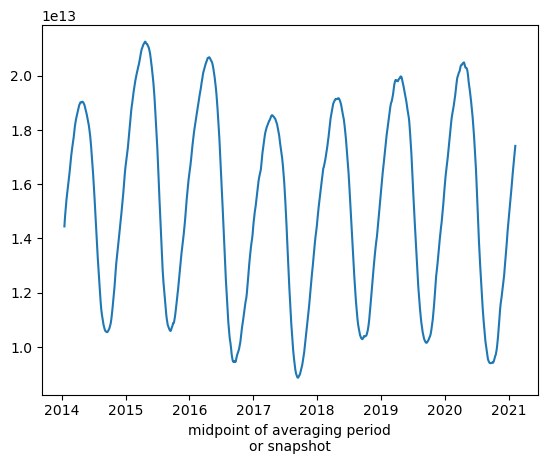

In [49]:
tmp2.plot()

In [57]:
rAc2 = sg2.rAc.drop_vars(['XC','YC'])

st = time.time()
tmp2 = (rAc2*tmpS).sum(dim=['i','j']).compute()
et = time.time();
tt= et-st;

print(tt, len(tmp2)/(tt))

/home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 14.88 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


35.536550760269165 72.57316607337684


In [90]:
tmp2000 = tmpS.sel(time=slice('2014-01-01', '2015-01-01'))
txx = tmp2000.min(dim='time').compute()

In [92]:
tmp2000 = tmpS.sel(time=slice('2014','2024'))
txx = tmp2000.min(dim='time').compute()

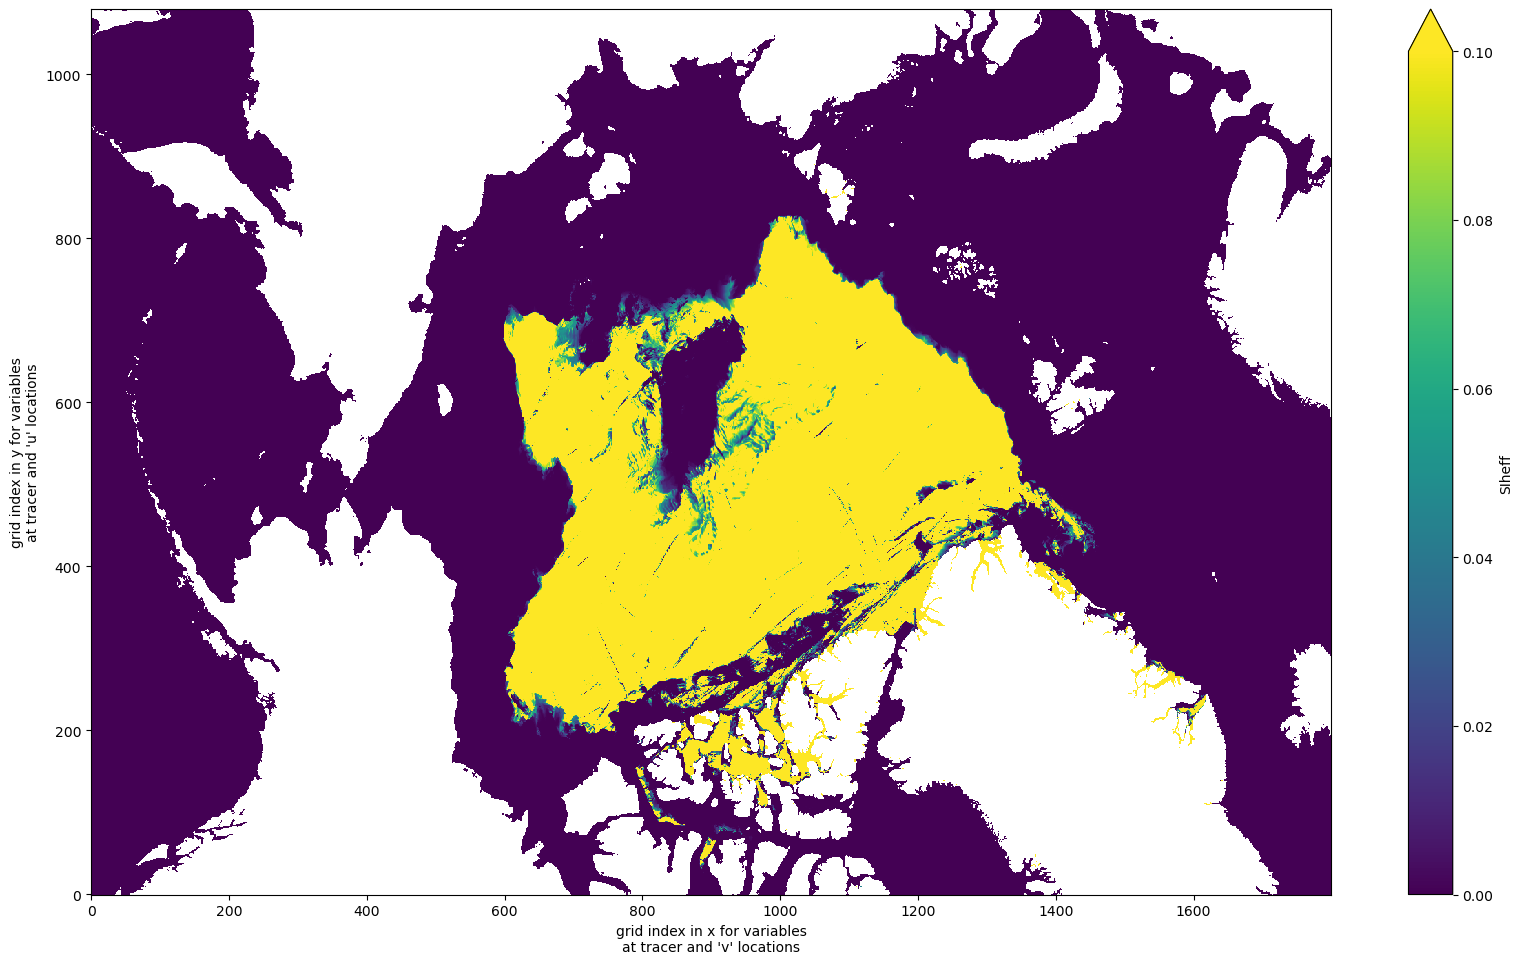

In [99]:
plt.figure(figsize=[20,11.5]);txx.plot(vmin=0,vmax=0.1)

In [101]:
st=time.time()
tmx = tmp2000.max(dim='time').compute()
et = time.time()
print(et-st)

27.70464015007019


In [31]:
st = time.time()
k=2579;
ice_vol = (dsx.SIheff[:k]*sg.rAc).sum(dim=['j','i']).compute()
et = time.time();
print(et-st, 2k/(et-s))

/home/jpluser/miniforge3/envs/jupyter/lib/python3.11/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 14.88 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [108]:
min_siheff_year = {}
for year in range(2014, 2022):
    st = time.time()
    print(year)
    tmpY = tmpS.sel(time=slice(f'{year}-01-01', f'{year+1}-01-01'))
    print(tmpY.time.values[0], tmpY.time.values[-1])
    min_siheff_year[year] = tmpY.min(dim='time').compute()
    et = time.time();
    print(365/(et-st))

2014
2014-01-15T12:00:00.000000000 2015-01-01T12:00:00.000000000
46.20212114598282
2015
2015-01-01T12:00:00.000000000 2016-01-01T12:00:00.000000000
87.24927418647962
2016
2016-01-01T12:00:00.000000000 2017-01-01T12:00:00.000000000
88.03989384980551
2017
2017-01-01T12:00:00.000000000 2018-01-01T12:00:00.000000000
76.7958495393817
2018
2018-01-01T12:00:00.000000000 2019-01-01T12:00:00.000000000
56.673098834028686
2019
2019-01-01T12:00:00.000000000 2020-01-01T12:00:00.000000000
93.98581643358393
2020
2020-01-01T12:00:00.000000000 2021-01-01T12:00:00.000000000
97.86374719753874
2021
2021-01-01T12:00:00.000000000 2021-02-07T12:00:00.000000000
199.3756082670005


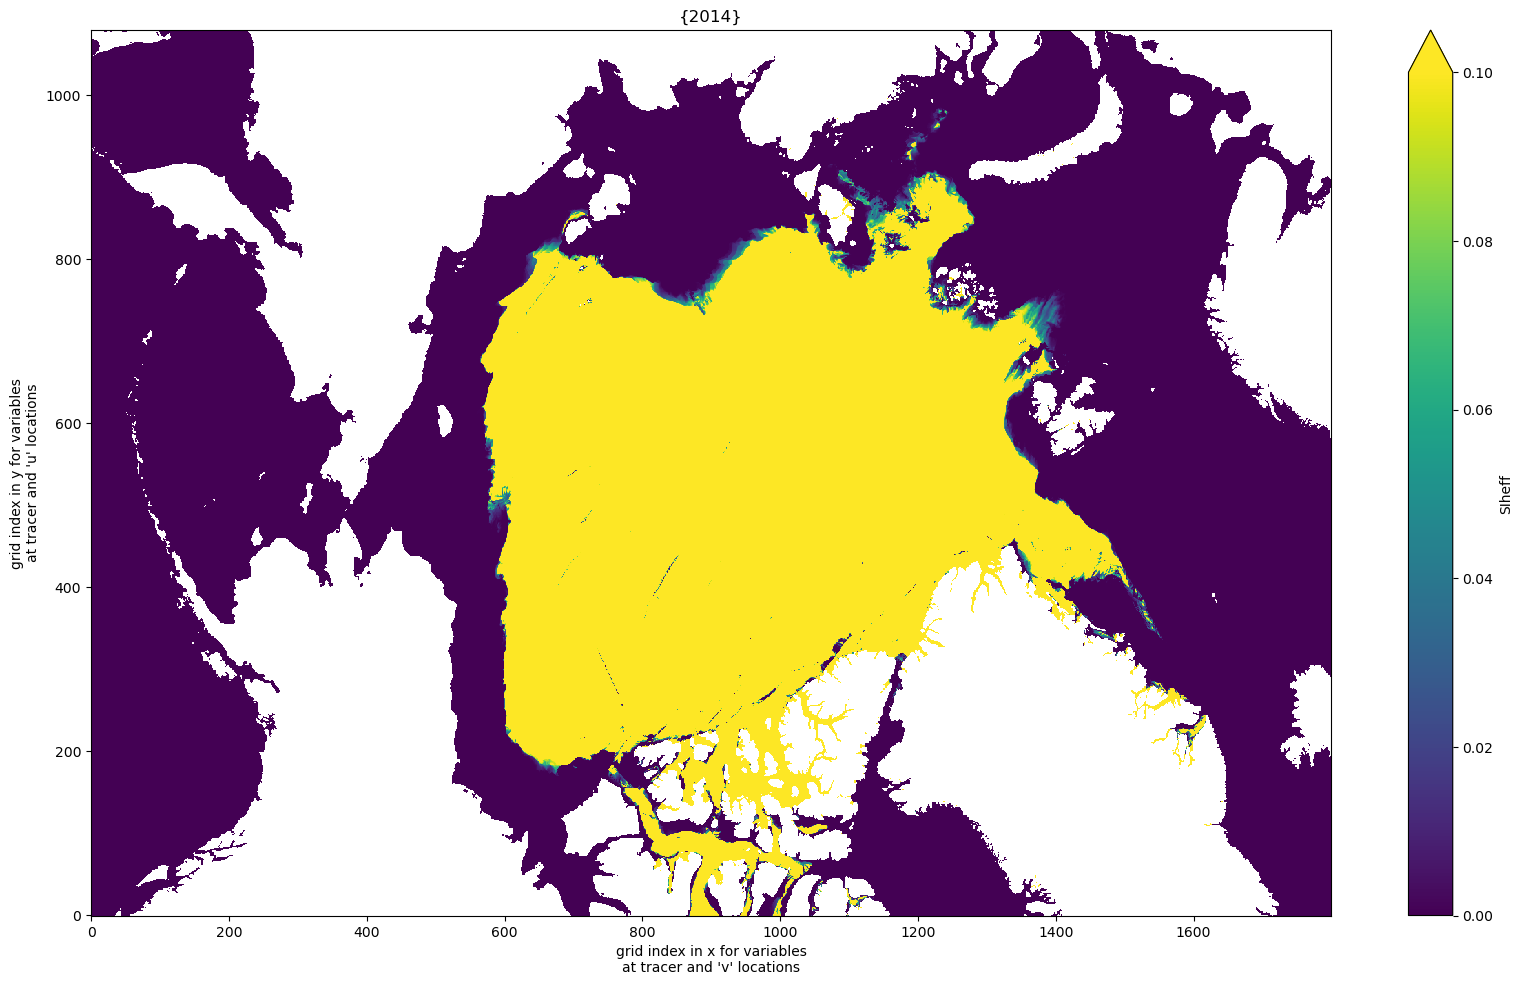

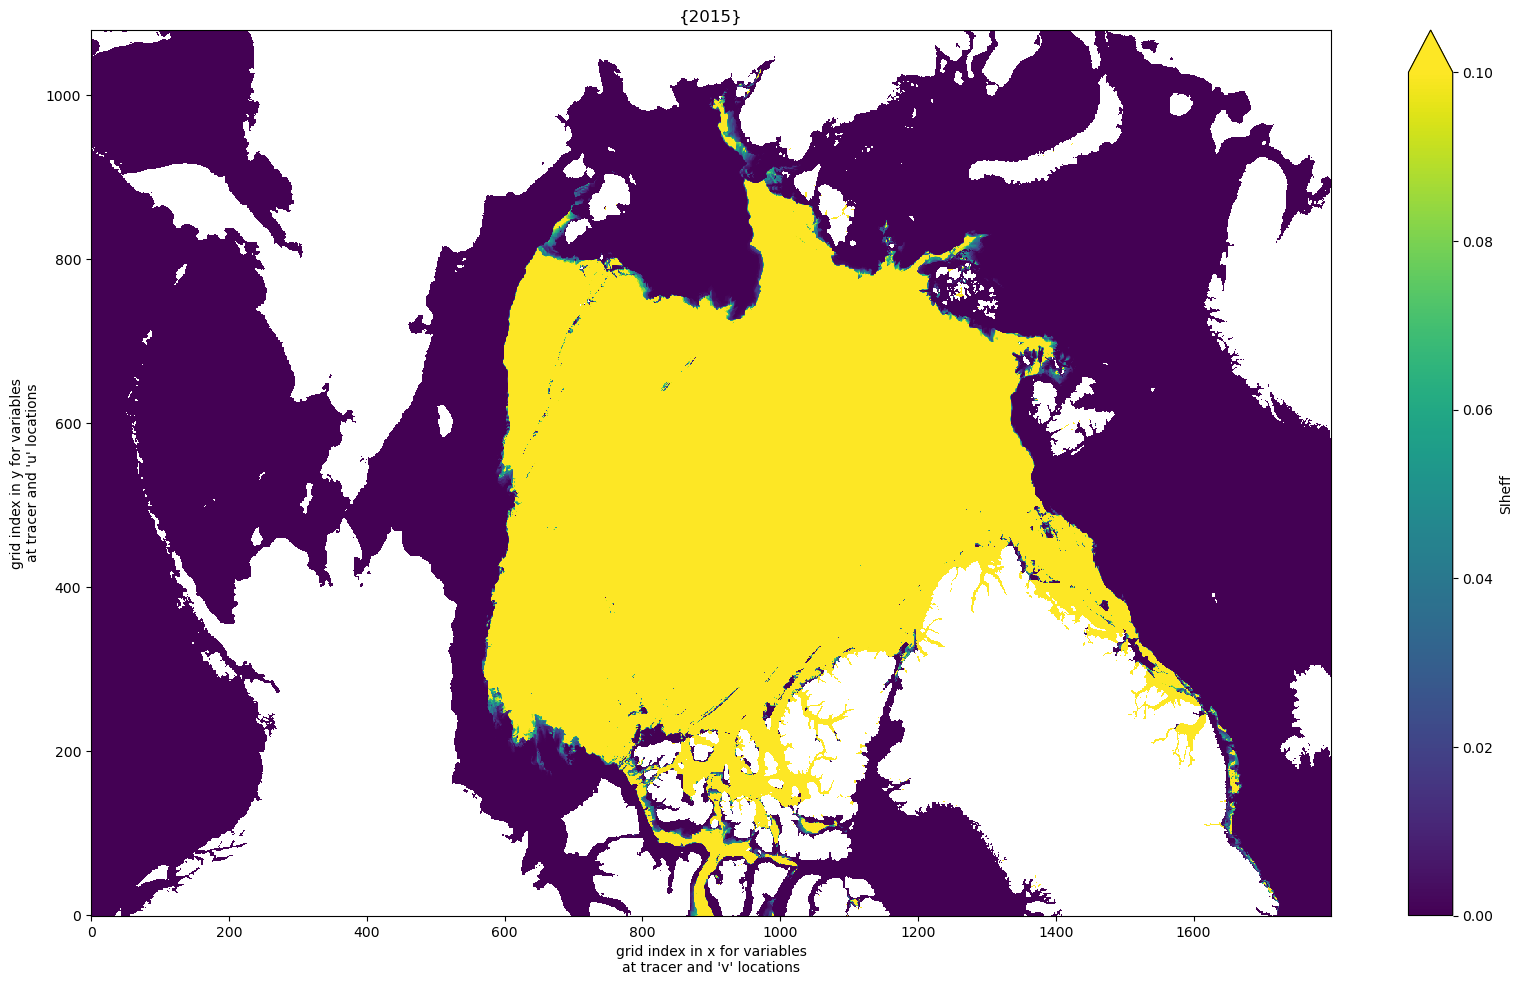

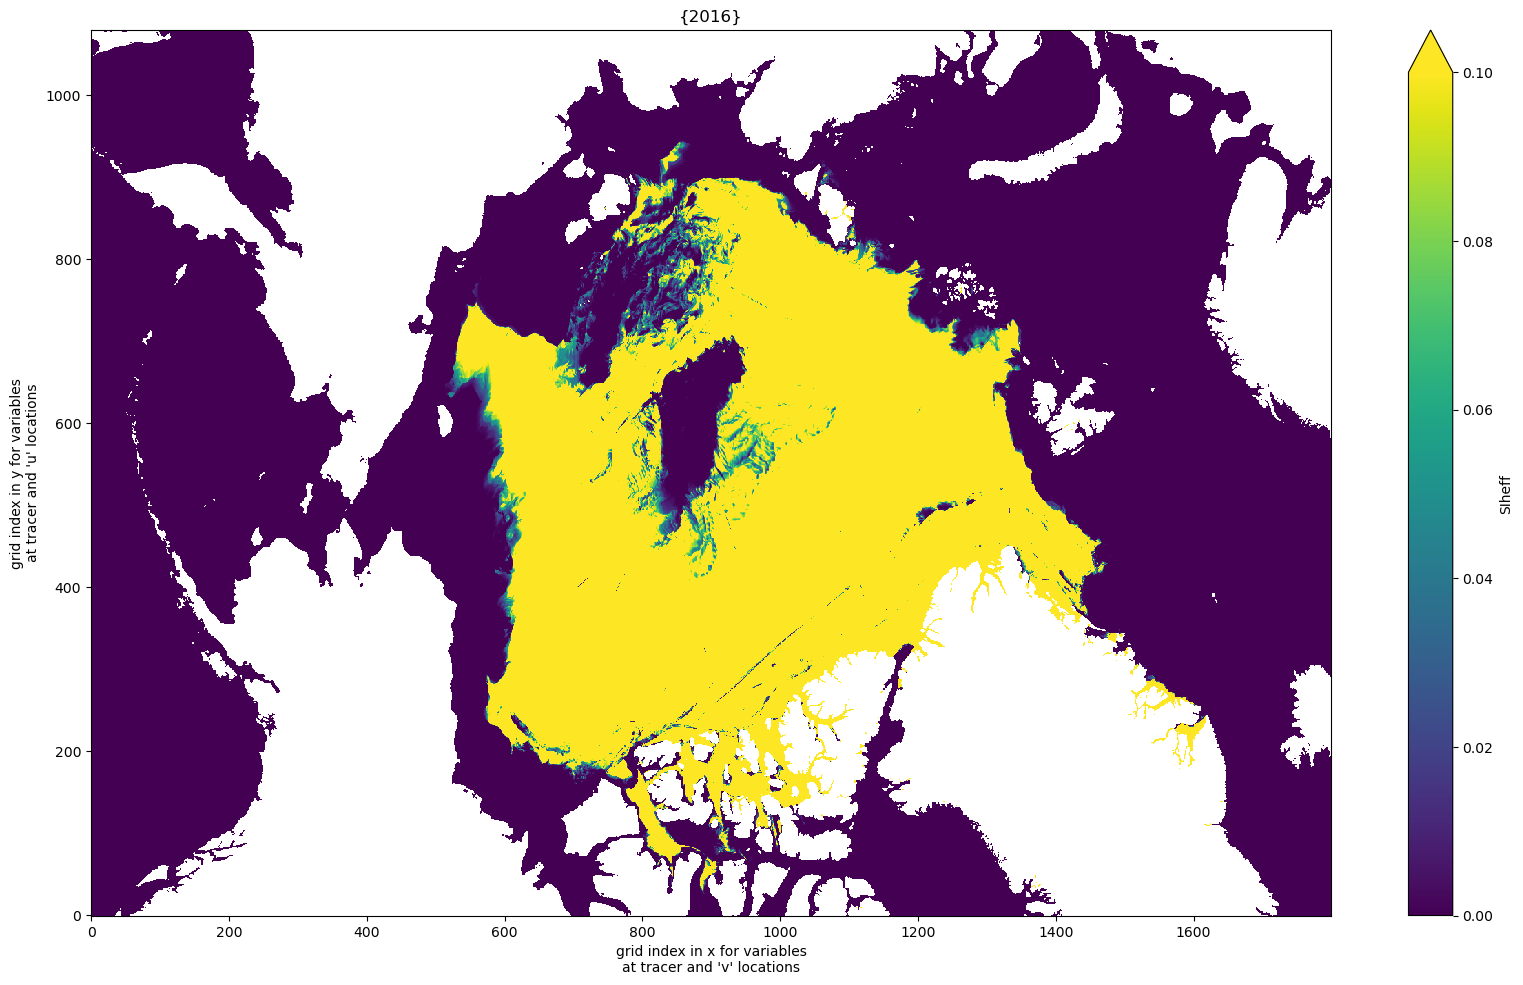

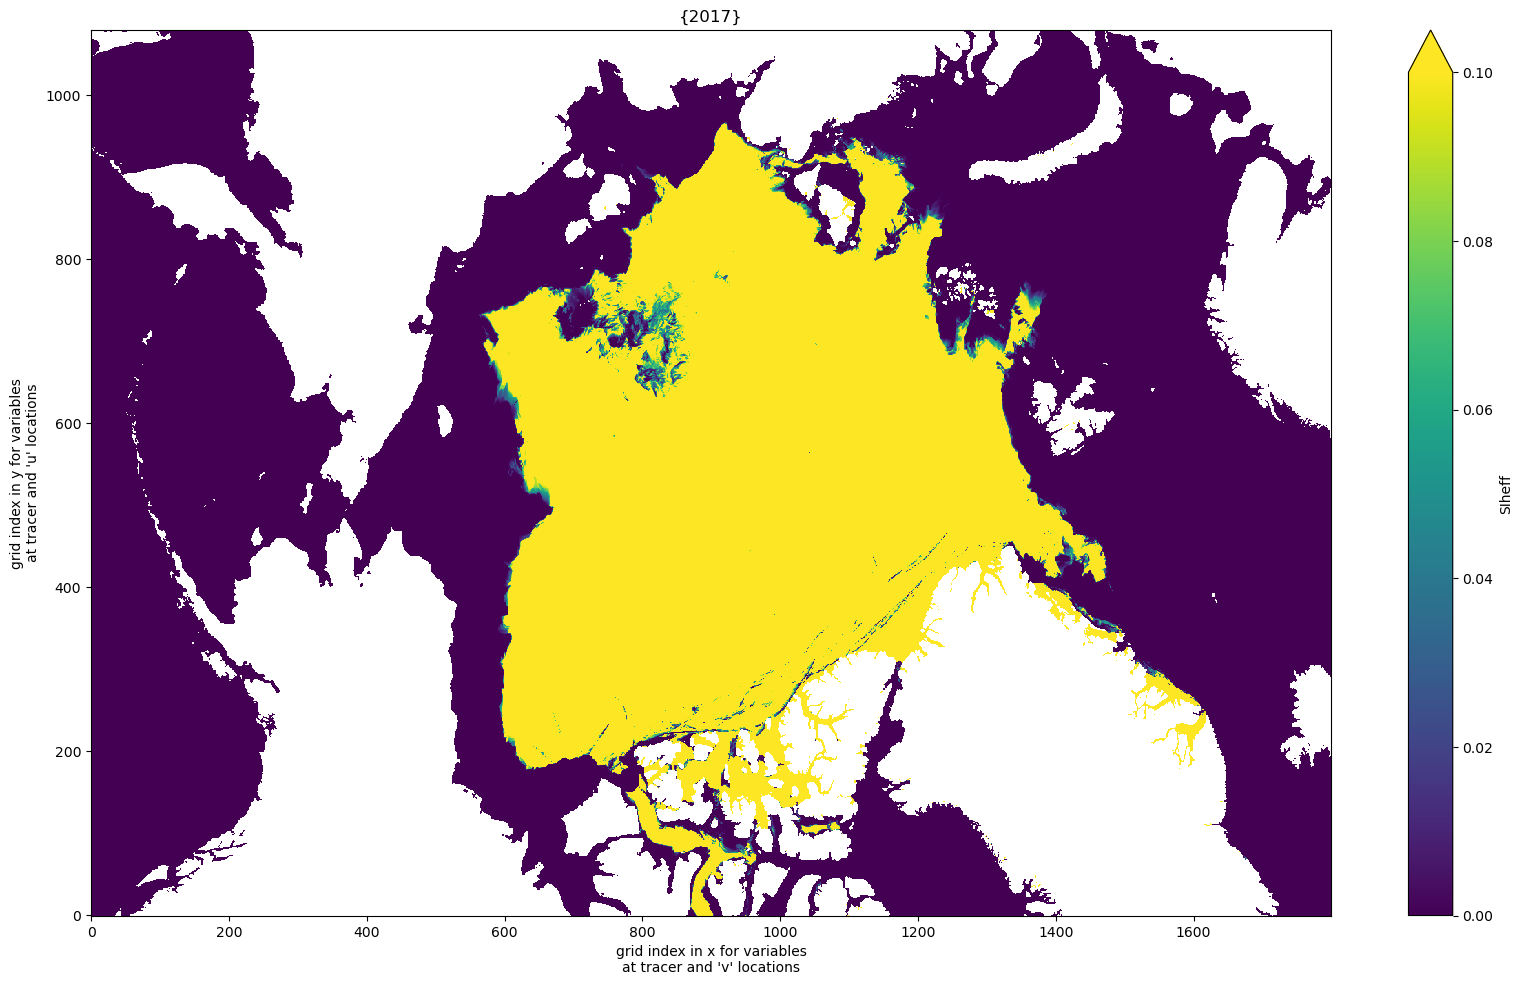

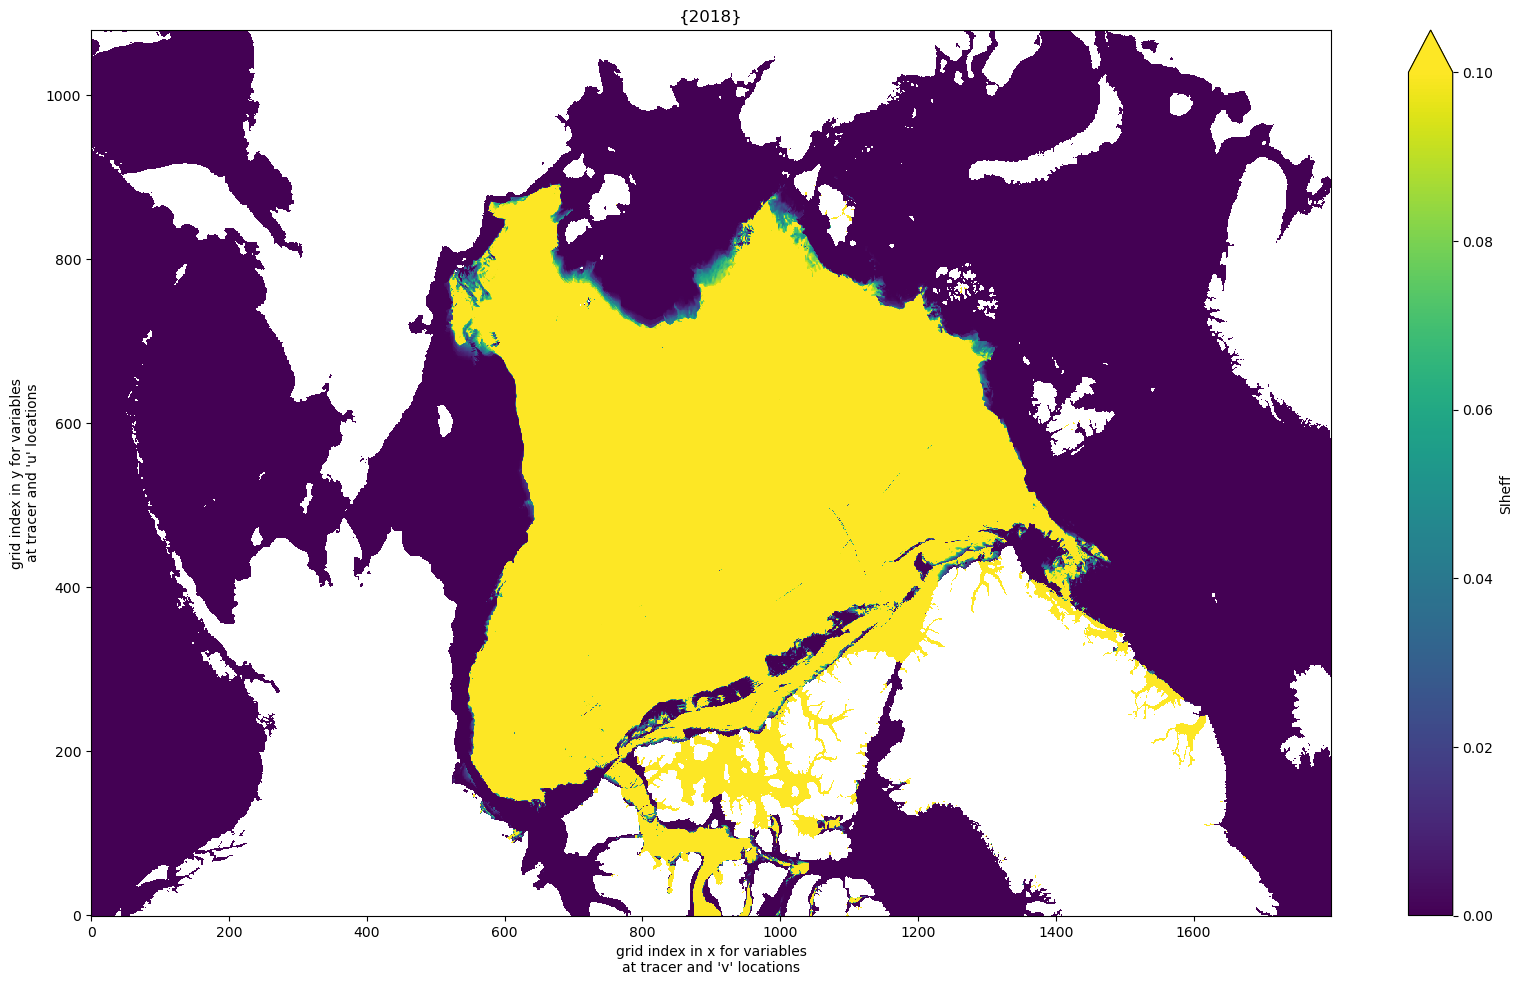

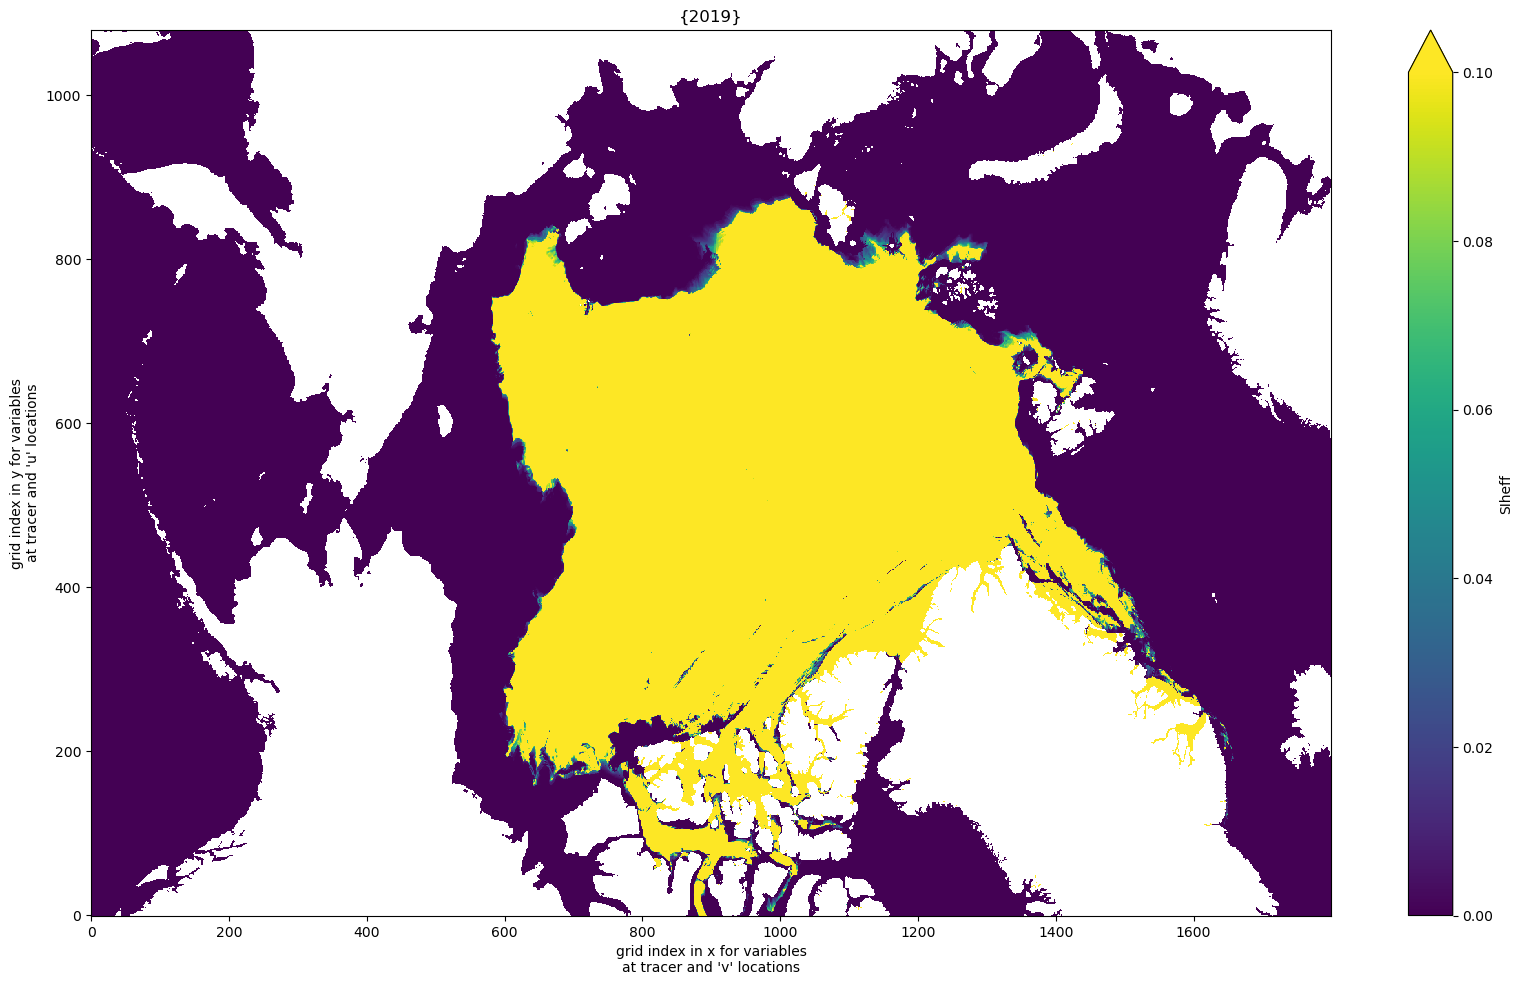

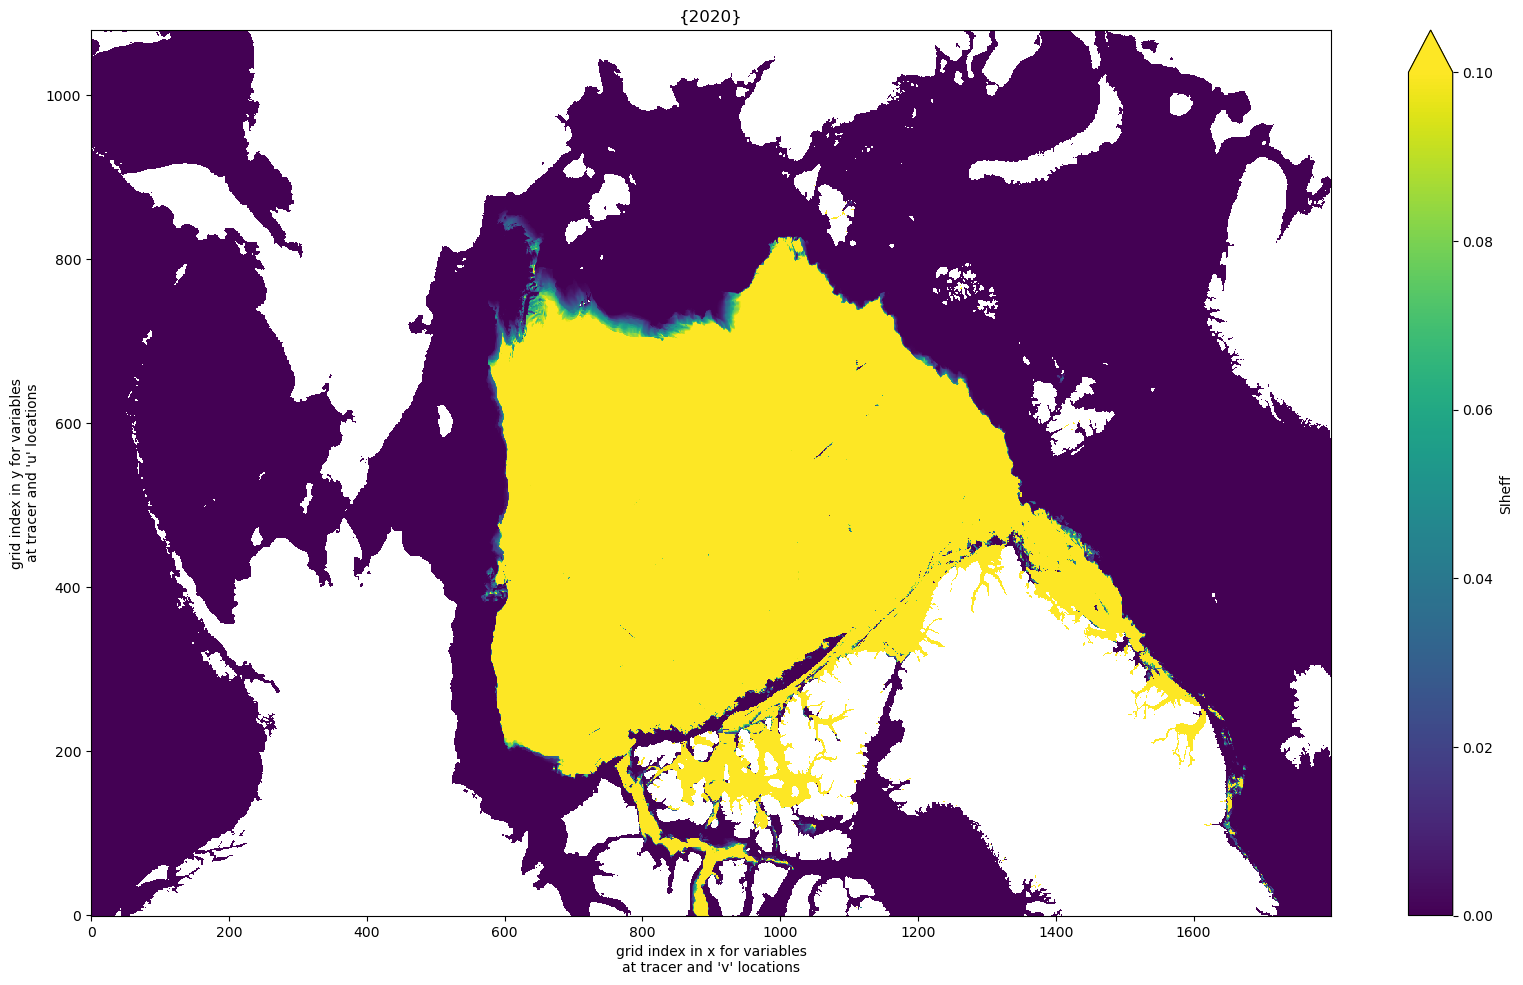

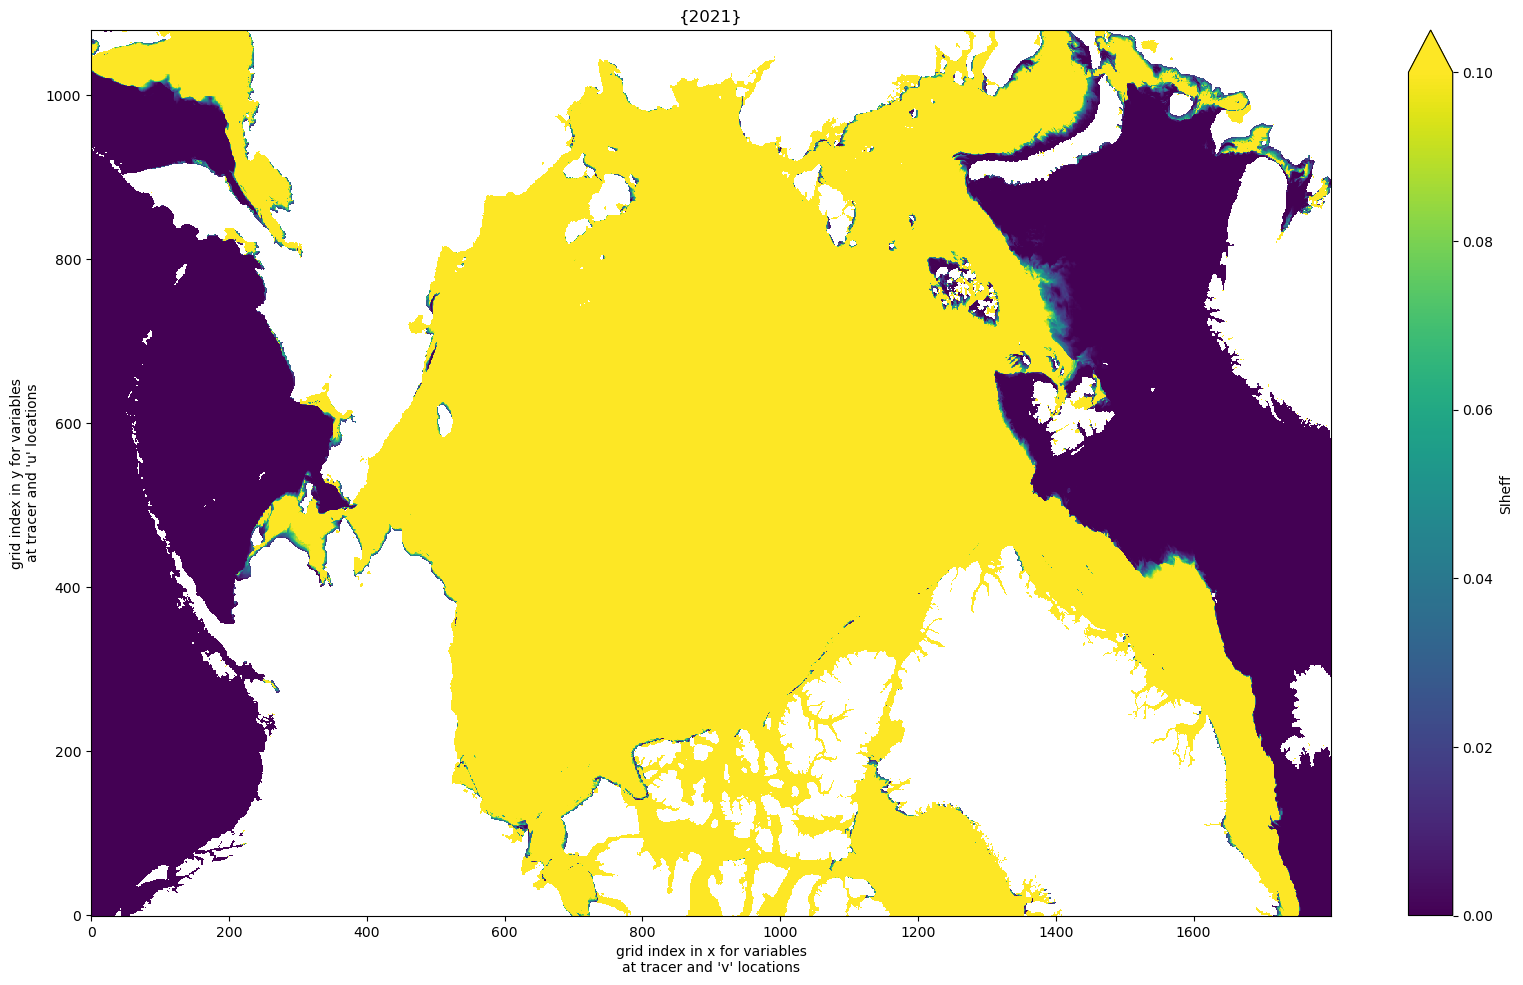

In [110]:
for year in range(2014, 2022):
    plt.figure(figsize=[20,11.5]);
    min_siheff_year[year].plot(vmin=0,vmax=0.1);
    plt.title({year})